In [97]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np
import os
import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [98]:
!curl -O https://raw.githubusercontent.com/praveenashokkumar/PUI2017_pak348/master/HW5_pak348/Part3/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv
!curl -O https://raw.githubusercontent.com/praveenashokkumar/PUI2017_pak348/master/HW5_pak348/Part3/API_SP.POP.TOTL_DS2_en_csv_v2.csv
!curl -O https://raw.githubusercontent.com/praveenashokkumar/PUI2017_pak348/master/HW5_pak348/Part3/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
!curl -O https://raw.githubusercontent.com/praveenashokkumar/PUI2017_pak348/master/HW5_pak348/Part3/data-pvLFI.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  233k  100  233k    0     0   744k      0 --:--:-- --:--:-- --:--:-- 1865k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  166k  100  166k    0     0   705k      0 --:--:-- --:--:-- --:--:-- 1731k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  41588      0 --:--:-- --:--:-- --:--:--  191k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
108   434  108   434    0     0   2292      0 --:--:-- --:--:-- --:--:--  9041


In [99]:
df1 = pd.read_csv("World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")
df2 = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2.csv")
df3 = pd.read_csv("data-pvLFI.csv")
df4 = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv")

In [100]:
df1.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [103]:
df2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [106]:
df2.rename(columns = {'2012' : 'pop'}, inplace=True)

In [104]:
df3.columns

Index(['Country', 'Guns/100 inhabitants', 'Number of mass shootings'], dtype='object')

In [105]:
df4.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [107]:
df4.rename(columns = {'2012' : 'gdp'}, inplace=True)

In [108]:
df = df1.merge(df2, left_on='Country/Territory', right_on='Country Name', how='inner')
df = df.merge(df3, left_on='Country Name', right_on='Country', how='inner')
df = df.merge(df4, left_on='Country Name', right_on='Country Name', how='inner')
df.head()

Country/Territory ISO code Source  % of homicides by firearm  \
0         Australia       AU    NSO                       11.5   
1           Austria       AT    CTS                       29.5   
2            Canada       CA    CTS                       32.0   
3           Denmark       DK    CTS                       31.9   
4           Finland       FI    CTS                       19.8   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            30.0                                      0.14   
1                            18.0                                      0.22   
2                           173.0                                      0.51   
3                            15.0                                      0.27   
4                            24.0                                      0.45   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       42.0                             15.0   
1                       14.0                             30.4   
2                       13.0                             30.8   
3                       54.0                             12.0   
4                        4.0                             45.3   

   Average total all civilian firearms Country Name      ...        \
0                            3050000.0    Australia      ...         
1                            2500000.0      Austria      ...         
2                            9950000.0       Canada      ...         
3                             650000.0      Denmark      ...         
4                            2400000.0      Finland      ...         

         2008_y        2009_y        2010_y        2011_y           gdp  \
0  1.055335e+12  9.271683e+11  1.142877e+12  1.390557e+12  1.538194e+12   
1  4.276115e+11  3.975943e+11  3.902119e+11  4.290374e+11  4.074516e+11   
2  1.549131e+12  1.371153e+12  1.613464e+12  1.788648e+12  1.824289e+12   
3  3.533611e+11  3.212414e+11  3.219954e+11  3.440032e+11  3.271489e+11   
4  2.837425e+11  2.514990e+11  2.477998e+11  2.736742e+11  2.567065e+11   

         2013_y        2014_y        2015_y        2016_y  Unnamed: 61_y  
0  1.567179e+12  1.459598e+12  1.345383e+12  1.204616e+12            NaN  
1  4.282484e+11  4.383762e+11  3.769674e+11  3.864278e+11            NaN  
2  1.842628e+12  1.792883e+12  1.552808e+12  1.529760e+12            NaN  
3  3.435844e+11  3.522970e+11  3.013078e+11  3.061429e+11            NaN  
4  2.699801e+11  2.726093e+11  2.323617e+11  2.367850e+11            NaN  

[5 rows x 135 columns]

In [111]:
df = df[['Country Name', 'Average total all civilian firearms', 'pop', 'gdp', 'Number of homicides by firearm', 'Country', 'Guns/100 inhabitants', 'Number of mass shootings']]

In [112]:
df.head()


Country Name  Average total all civilian firearms         pop           gdp  \
0    Australia                            3050000.0  22728254.0  1.538194e+12   
1      Austria                            2500000.0   8429991.0  4.074516e+11   
2       Canada                            9950000.0  34750545.0  1.824289e+12   
3      Denmark                             650000.0   5591572.0  3.271489e+11   
4      Finland                            2400000.0   5413971.0  2.567065e+11   

   Number of homicides by firearm    Country  Guns/100 inhabitants  \
0                            30.0  Australia                  15.0   
1                            18.0    Austria                  30.4   
2                           173.0     Canada                  30.8   
3                            15.0    Denmark                  12.0   
4                            24.0    Finland                  45.3   

   Number of mass shootings  
0                         4  
1                         1  
2                         4  
3                         0  
4                         2

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


### Mass Shooting Vs GDP in Absolute Numbers

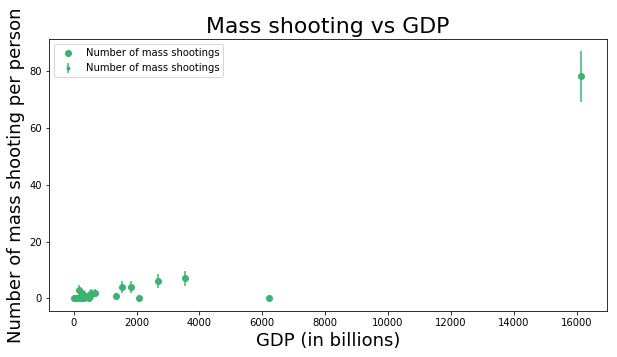

Figure 1. Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [113]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'], color='mediumseagreen')
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.', color='mediumseagreen')
ax.set_xlabel("GDP (in billions)", fontsize = 18)
ax.set_ylabel("Number of mass shooting per person", fontsize = 18)
ax.set_ylim()
ax.set_title("Mass shooting vs GDP", fontsize=22)
ax.legend()
plt.show()
print ("Figure 1. Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

### Mass Shooting Vs GDP Per Person

In [118]:
df['gdp_pp'] = df['gdp'] / df['pop']

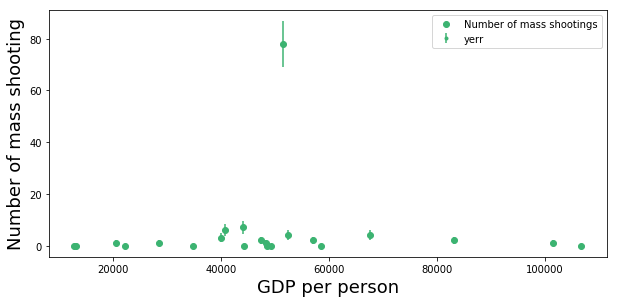

Figure 2. Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings. USA does not have the highest GDP per person, but has highest mass shootings.


In [126]:
fig= plt.figure(figsize=(10,10)) 
ax2 = fig.add_subplot(211)
scatter = ax2.scatter(df['gdp_pp'], df['Number of mass shootings'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['Number of mass shootings'], 
            yerr = np.sqrt(df["Number of mass shootings"]*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax2.set_ylabel('Number of mass shooting', fontsize = 18)
ax2.set_ylim()
ax2.legend()
plt.show()
print ("Figure 2. Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings. " +
       "USA does not have the highest GDP per person, but has highest mass shootings.")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [128]:
df['CivilianFireArms_pp'] = df["Average total all civilian firearms"] / df['pop'] * 1e3

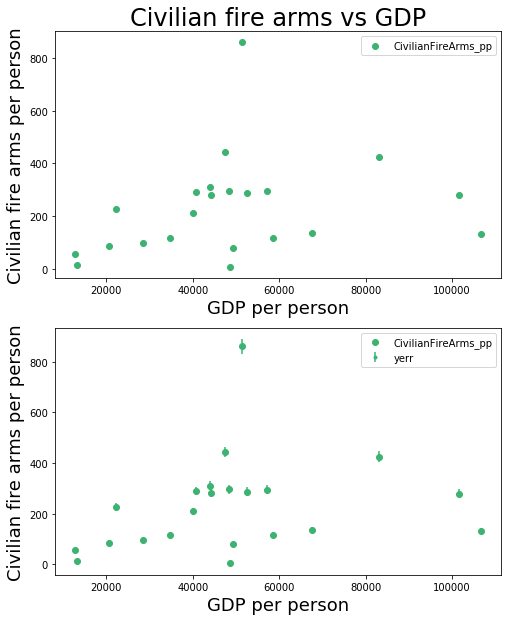

Figure 3. Average number of civilian fire arms per person, The datapoint to the top of the plot is the USA, which does not have the highest GDP per person, but has highest number of civilian fire arms per person.


In [130]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['gdp_pp'], df['CivilianFireArms_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['CivilianFireArms_pp'], 
            yerr = np.sqrt(df['CivilianFireArms_pp']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax1.set_xlabel('GDP per person', fontsize = 18)
ax1.set_ylabel('Civilian fire arms per person', fontsize = 18)
ax1.set_ylim()
ax1.legend()
plt.title("Civilian fire arms vs GDP", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp_pp'], df['CivilianFireArms_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp_pp'], df['CivilianFireArms_pp'], 
            yerr = np.sqrt(df['CivilianFireArms_pp']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP per person', fontsize = 18)
ax2.set_ylabel('Civilian fire arms per person', fontsize = 18)
ax2.set_ylim()
ax2.legend()
plt.show()
print ("Figure 3. Average number of civilian fire arms per person, " + 
       "The datapoint to the top of the plot is the USA, " + 
       "which does not have the highest GDP per person, " +
       "but has highest number of civilian fire arms per person.")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [131]:
df['NumberOfHomicide_pp'] = df['Number of homicides by firearm'] / df['pop'] * 1e3


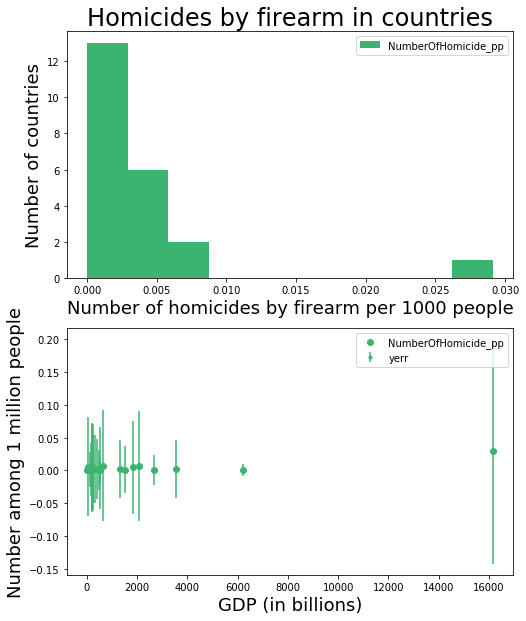

Figure 4. Number of homicides by firearm per 1000 people, The datapoint on the top right of the plot is the USA, which has the highest GDP, and highest number of homicides by firearm per 1000 people.


In [135]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
ax1.hist(df['NumberOfHomicide_pp'], color='mediumseagreen')
ax1.set_xlabel('Number of homicides by firearm per 1000 people', fontsize = 18)
ax1.set_ylabel('Number of countries', fontsize = 18)
ax1.set_ylim()
ax1.legend()
plt.title("Homicides by firearm in countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['gdp'] / 1e9, df['NumberOfHomicide_pp'], color='mediumseagreen')
ax2.errorbar(df['gdp'] / 1e9, df['NumberOfHomicide_pp'], 
            yerr = np.sqrt(df['NumberOfHomicide_pp']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
ax2.set_xlabel('GDP (in billions)', fontsize = 18)
ax2.set_ylabel('Number among 1 million people', fontsize = 18)
ax2.set_ylim()
ax2.legend()

plt.show()
print ("Figure 4. Number of homicides by firearm per 1000 people, " + 
       "The datapoint on the top right of the plot is the USA, " + 
       "which has the highest GDP, " +
       "and highest number of homicides by firearm per 1000 people.")

### plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color
with and without errorbars

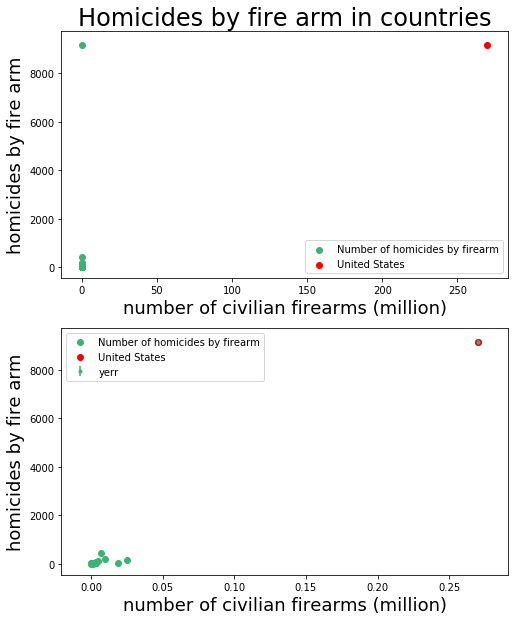

Figure 5. Number of homicides by firearm vs number of civilian firearms (million), The datapoint on the top right of the plot is the USA, which has the highest number of civilian firearms, and has highest number of homicides by fire arm.


In [138]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms']/1e9, df['Number of homicides by firearm'], color='mediumseagreen')
ax1.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax1.set_ylabel('homicides by fire arm', fontsize = 18)
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of homicides by firearm'][df['Country Name']=='United States'], label='United States', c='r')
ax1.set_ylim()
ax1.legend()
plt.title("Homicides by fire arm in countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms']/1e9, df['Number of homicides by firearm'], color='mediumseagreen')
ax2.errorbar(df['Average total all civilian firearms']/1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e9, df['Number of homicides by firearm'][df['Country Name']=='United States'], label='United States', c='r')
ax2.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax2.set_ylabel('homicides by fire arm', fontsize = 18)
ax2.set_ylim()
ax2.legend()
plt.show()
print ("Figure 5. Number of homicides by firearm vs number of civilian firearms (million), " + 
       "The datapoint on the top right of the plot is the USA, " + 
       "which has the highest number of civilian firearms, " +
       "and has highest number of homicides by fire arm.")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


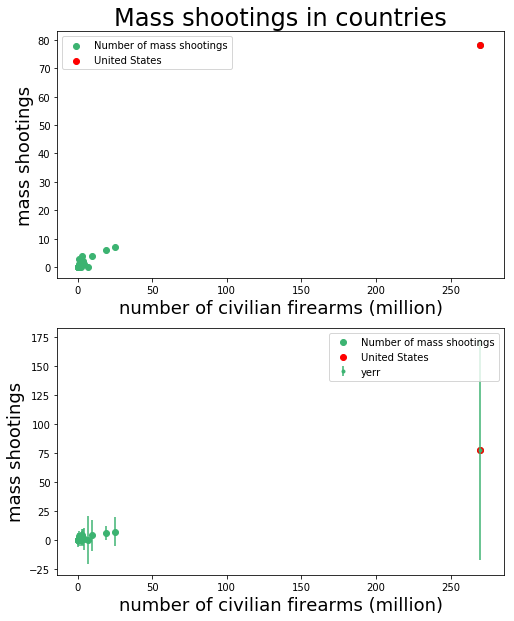

Figure 6. Number of mass shootings vs number of civilian firearms (million), The datapoint on the top right of the plot is the USA, which has the highest number of civilian firearms, and has highest number of mass shootings.


In [139]:
fig = plt.figure(figsize=(8,10)) 

ax1 = fig.add_subplot(211)
scatter = ax1.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], color='mediumseagreen')
ax1.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax1.set_ylabel('mass shootings', fontsize = 18)
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of mass shootings'][df['Country Name']=='United States'], label='United States', c='r')
ax1.set_ylim()
ax1.legend()
plt.title("Mass shootings in countries", fontsize=24)

ax2 = fig.add_subplot(212)
scatter = ax2.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], color='mediumseagreen')
ax2.errorbar(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of homicides by firearm']*1.0), fmt = '.', color='mediumseagreen', label='yerr')
plt.scatter(df['Average total all civilian firearms'][df['Country Name']=='United States']/1e6, df['Number of mass shootings'][df['Country Name']=='United States'], label='United States', c='r')
ax2.set_xlabel('number of civilian firearms (million)', fontsize = 18)
ax2.set_ylabel('mass shootings', fontsize = 18)
ax2.set_ylim()
ax2.legend()

plt.show()
print ("Figure 6. Number of mass shootings vs number of civilian firearms (million), " + 
       "The datapoint on the top right of the plot is the USA, " + 
       "which has the highest number of civilian firearms, " +
       "and has highest number of mass shootings.")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [153]:
import seaborn as sns
import statsmodels.api as sm

In [154]:

y = df['Number of mass shootings']
x = df["Average total all civilian firearms"]

print(y.mean())
print(x.mean())

5.09090909091
16285227.2727


In [155]:
y = df['Number of mass shootings'][:21]
x = df["Average total all civilian firearms"][:21] / 10000000

Text(0,0.5,'Number of mass shootings')

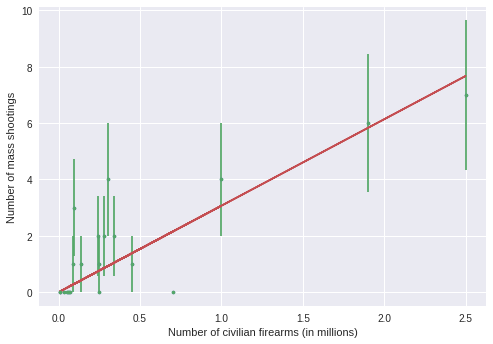

In [158]:
oModel = sm.OLS(endog = y, exog = x).fit()

pl.plot(x, y, '.')
yerr = np.sqrt(y)
pl.errorbar(x,y, yerr, fmt='.')
pl.plot(x, oModel.fittedvalues, '-')
pl.xlabel("Number of civilian firearms (in millions)")
pl.ylabel("Number of mass shootings")

Text(0,0.5,'Number of mass shootings')

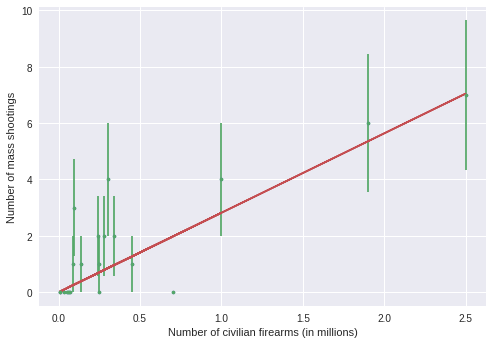

In [159]:
yerr = np.sqrt(y)
wModel = sm.WLS(endog = y, exog = x, weights = 1.0/(yerr+1)).fit()

pl.plot(x, y, '.')
yerr = np.sqrt(y)
pl.errorbar(x,y, yerr, fmt='.')
pl.plot(x, wModel.fittedvalues, '-')
pl.xlabel("Number of civilian firearms (in millions)")
pl.ylabel("Number of mass shootings")


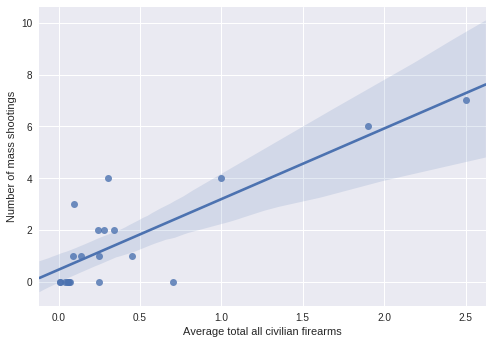

In [160]:
sns.regplot(x, y, data=df)


Coefficients: [ 2.72145037  0.47506652]


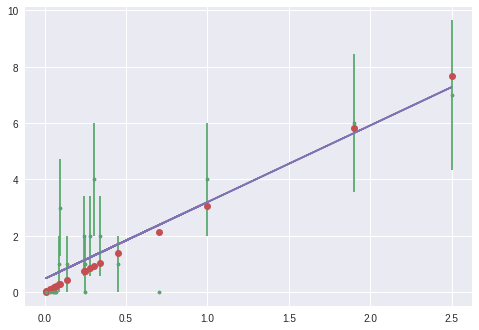

In [161]:
fit = np.polyfit(x, y, 1)
yfit = (fit[0] * x) + fit[1]

pl.plot(x, y, '.')
yerr = np.sqrt(y)
pl.errorbar(x,y, yerr, fmt='.')
pl.plot(x, oModel.fittedvalues, 'o')
pl.plot(x, yfit, '-')

print("Coefficients: {}".format(fit))


## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



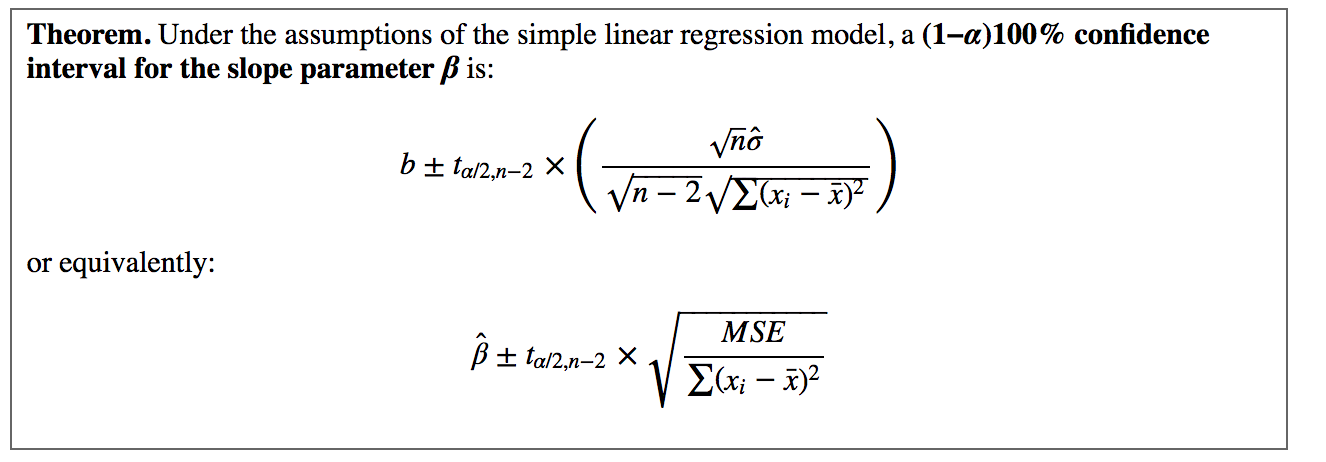

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

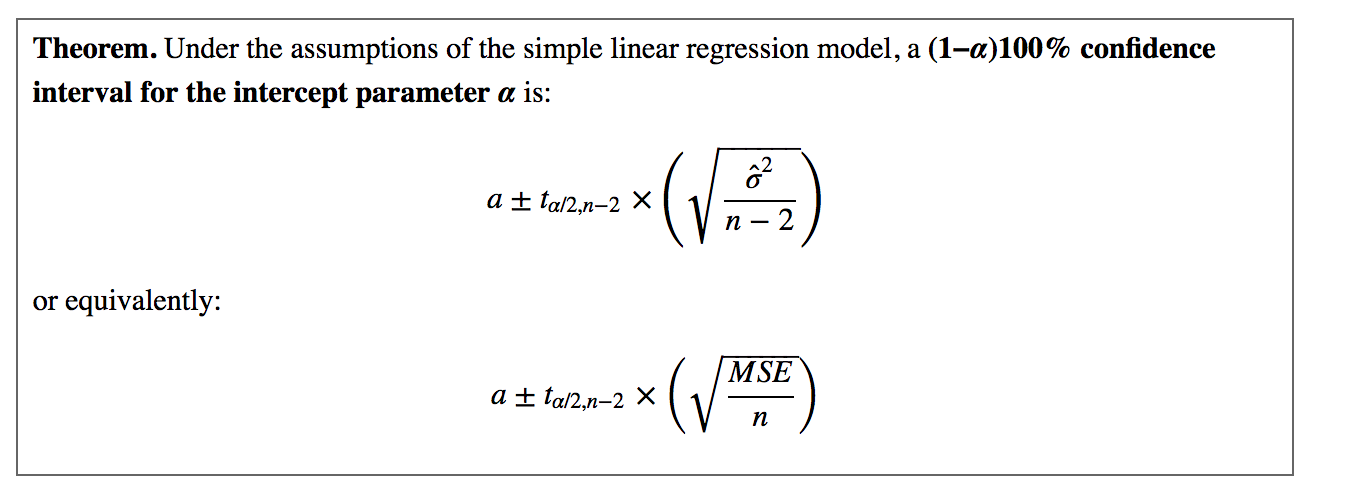

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

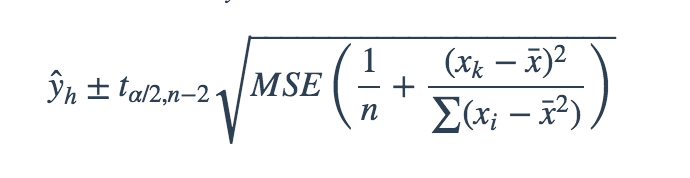

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

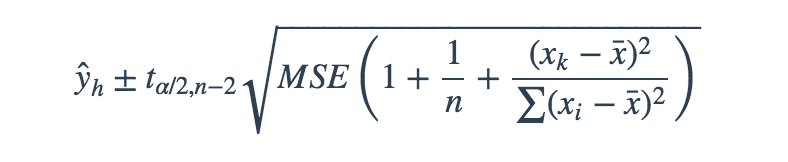

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

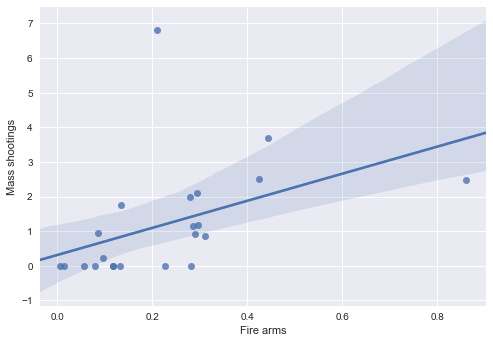

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

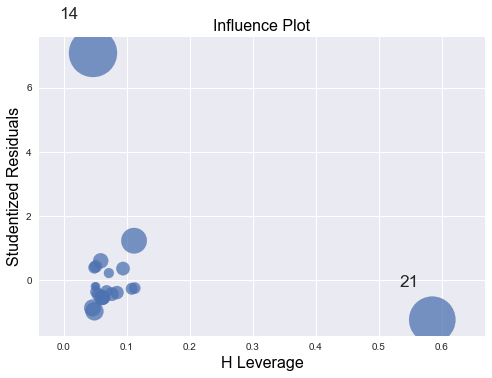

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings